In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


#This cell just makes the main imports and set device to cuda

# Import Torch
import torch
# Setup device
dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(dev)

# Imports
import torchvision.models as models
import torchvision.transforms as T
from PIL import Image
from torch.autograd import Variable
import matplotlib.pyplot as plt
from glob import glob
from random import shuffle
import os
%matplotlib inline
import torch
from torchvision.datasets import ImageFolder
import torchvision.transforms as T
from torch.utils.data import DataLoader
import csv
from PIL import Image
import cv2
import random
from scipy import ndimage

cuda


In [2]:
#READ TEST.CSV AND TRAIN.CSV TO OBTAIN BOUNDING BOXES

directory='/kaggle/input/ccaiunict-2023' #Save the directory
bounding_boxes={'train':[],'test':[]} #create a dictionary to save every bounding box
for filename in ['train.csv','test.csv']: #sweep the two files
    if filename.endswith('.csv'): #open only if .csv
        file_path = os.path.join(directory, filename)
        
        # Open the CSV file
        with open(file_path, 'r') as csv_file:
            csv_reader = csv.reader(csv_file)
            print('FILE: ', filename) #print the file name
             # Skip the header row if it exists
            header = next(csv_reader, None)
            # Read and process each row in the CSV file
            for row in csv_reader:
                row=  [int(row[i]) for i in [1,2,3,4]]
                bounding_boxes[filename[:-4]].append(row) #Save the bounding boxes and eventually also the label
                
                
        # Close the CSV file
        csv_file.close()

FILE:  train.csv
FILE:  test.csv


In [3]:
#Preprocess images according to their bounding boxes
#saving in new folders ('train cropped' and 'test cropped') the results

import shutil
# remove the previous folders if they exist
if os.path.exists("test cropped"):
    shutil.rmtree("test cropped")
if os.path.exists("train cropped"):
    shutil.rmtree("train cropped")

train_cropped_images=[]
    
#TRAIN FOLDER
source_dir=os.path.join(directory,"train") #get images from original train folder
destination_dir="train cropped" #Save images in new train cropped folder
# Iterate over subfolders
i=0 #To iterate over the bounding boxes
for root, dirs, files in sorted(os.walk(source_dir)): #iterate over all the subfolders and file
    print(root) #Show which folder is currently being analyzed
    for file in sorted(files):
        # Get the image file path
        image_path = os.path.join(root, file)
            
        # Open the image
        image = Image.open(image_path)
                
        # Get the bounding box coordinates for the image
        bounding_box = bounding_boxes['train'][i]
        i=1+i
                
        # Crop the image using the bounding box coordinates
        cropped_image = image.crop(bounding_box)
        train_cropped_images.append(np.array(cropped_image, dtype=np.int32))
        
                
        # Create the destination folder path
        destination_folder = os.path.join(destination_dir, os.path.relpath(root, source_dir))
        os.makedirs(destination_folder, exist_ok=True)
                
        # Save the cropped image
        cropped_image.save(os.path.join(destination_folder, file))
        
# SAME THING BUT WITH TEST
source_dir=os.path.join(directory,"test")
destination_dir="test cropped"
test_cropped_images=[]
# Iterate over subfolders
i=0
for root, dirs, files in sorted(os.walk(source_dir)):
    print(root)
    for file in sorted(files):
        # Get the image file path
        image_path = os.path.join(root, file)
            
        # Open the image
        image = Image.open(image_path)
                
        # Get the bounding box coordinates for the image
        bounding_box = bounding_boxes['test'][i]
        i=1+i
                
        # Crop the image using the bounding box coordinates
        cropped_image = image.crop(bounding_box)
        test_cropped_images.append(np.array(cropped_image, dtype=np.int32))
                
        # Create the destination folder path
        destination_folder = os.path.join(destination_dir, os.path.relpath(root, source_dir))
        os.makedirs(destination_folder, exist_ok=True)
                
        # Save the cropped image
        cropped_image.save(os.path.join(destination_folder, file))

/kaggle/input/ccaiunict-2023/train
/kaggle/input/ccaiunict-2023/train/00
/kaggle/input/ccaiunict-2023/train/01
/kaggle/input/ccaiunict-2023/train/02
/kaggle/input/ccaiunict-2023/train/03
/kaggle/input/ccaiunict-2023/train/04
/kaggle/input/ccaiunict-2023/train/05
/kaggle/input/ccaiunict-2023/train/06
/kaggle/input/ccaiunict-2023/train/07
/kaggle/input/ccaiunict-2023/test


In [4]:
#Preprocess images using derivative filters

import shutil
# remove the previous folders if they exist
if os.path.exists("test derivative"):
    shutil.rmtree("test derivative")
if os.path.exists("train derivative"):
    shutil.rmtree("train derivative")

    
    
    
    

train_cropped_images_derivative_filter=[]
    
#TRAIN FOLDER
source_dir=os.path.join(directory,"train") #get images from original train folder
destination_dir="train derivative" #Save images in new train cropped folder
# Iterate over subfolders
iteration=0 #To iterate over the bounding boxes
for root, dirs, files in sorted(os.walk(source_dir)): #iterate over all the subfolders and file
    print(root) #Show which folder is currently being analyzed
    for file in sorted(files):
        # Get the image file path
        image_path = os.path.join(root, file)
            
        # Open the image
        image = Image.open(image_path)
                
        # Get the bounding box coordinates for the image
        bounding_box = bounding_boxes['train'][iteration]
        iteration+=1
                
        # Crop the image using the bounding box coordinates
        cropped_image = image.crop(bounding_box)
        image_colored=np.array(cropped_image, dtype=np.int32)
        

        #cropped_image = cropped_image.convert('L') #to grayscale
        # Load the image from file
        
        image_grayscale=cropped_image.convert('L') #to grayscale
        image_grayscale = np.array(image_grayscale, dtype=np.int32)

        sobel_h = ndimage.sobel(image_grayscale, 0)  # horizontal gradient
        sobel_v = ndimage.sobel(image_grayscale, 1)  # vertical gradient
        magnitude = np.sqrt(sobel_h**2 + sobel_v**2)
        if (np.max(magnitude)!=0):
            magnitude *= 255.0 / np.max(magnitude)  # normalization
            

        result_image=np.zeros(image_colored.shape)
        maximum=np.max(magnitude)
        H, W= magnitude.shape
        for i in range(H):
            for j in range(W):
                result_image[i,j]=(image_colored[i,j]*magnitude[i,j]/255)

        train_cropped_images_derivative_filter.append(result_image.astype(np.uint8))
        result_image = Image.fromarray(result_image.astype(np.uint8))
        
                
        # Create the destination folder path
        destination_folder = os.path.join(destination_dir, os.path.relpath(root, source_dir))
        os.makedirs(destination_folder, exist_ok=True)
                
        # Save the cropped image
        result_image.save(os.path.join(destination_folder, file))
        
# SAME THING BUT WITH TEST
source_dir=os.path.join(directory,"test")
destination_dir="test derivative"
test_cropped_images_derivative_filter=[]
# Iterate over subfolders
iteration=0
for root, dirs, files in sorted(os.walk(source_dir)):
    for file in sorted(files):
        # Get the image file path
        image_path = os.path.join(root, file)
            
        # Open the image
        image = Image.open(image_path)
                
        # Get the bounding box coordinates for the image
        bounding_box = bounding_boxes['test'][iteration]
        iteration+=1
                
        # Crop the image using the bounding box coordinates
        cropped_image = image.crop(bounding_box)
        image_colored=np.array(cropped_image, dtype=np.int32)
        #cropped_image = cropped_image.convert('L') #to grayscale
        # Load the image from file
        
        image_grayscale=cropped_image.convert('L') #to grayscale
        image_grayscale = np.array(image_grayscale, dtype=np.int32)

        sobel_h = ndimage.sobel(image_grayscale, 0)  # horizontal gradient
        sobel_v = ndimage.sobel(image_grayscale, 1)  # vertical gradient
        magnitude = np.sqrt(sobel_h**2 + sobel_v**2)
        if (np.max(magnitude)!=0):
            magnitude *= 255.0 / np.max(magnitude)  # normalization

        result_image=np.zeros(image_colored.shape)

        for i in range(H):
            for j in range(W):
                result_image[i,j]=(image_colored[i,j]*magnitude[i,j]/255)
        test_cropped_images_derivative_filter.append(result_image.astype(np.uint8))
        result_image = Image.fromarray(result_image.astype(np.uint8))
        maximum=np.max(magnitude)
                
        # Create the destination folder path
        destination_folder = os.path.join(destination_dir, os.path.relpath(root, source_dir))
        os.makedirs(destination_folder, exist_ok=True)
                
        # Save the cropped image
        result_image.save(os.path.join(destination_folder, file))
    print(root)

/kaggle/input/ccaiunict-2023/train
/kaggle/input/ccaiunict-2023/train/00
/kaggle/input/ccaiunict-2023/train/01
/kaggle/input/ccaiunict-2023/train/02
/kaggle/input/ccaiunict-2023/train/03
/kaggle/input/ccaiunict-2023/train/04
/kaggle/input/ccaiunict-2023/train/05
/kaggle/input/ccaiunict-2023/train/06
/kaggle/input/ccaiunict-2023/train/07
/kaggle/input/ccaiunict-2023/test


(-0.5, 126.5, 126.5, -0.5)

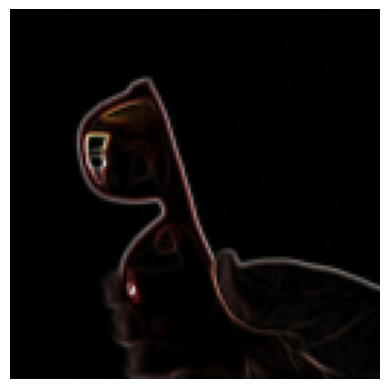

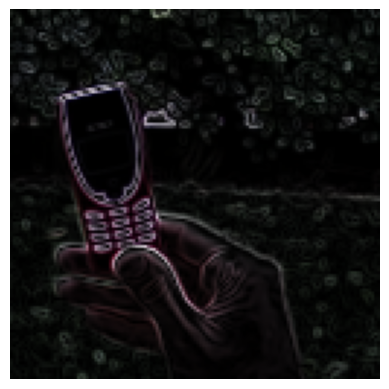

In [5]:
#show a random pic to show the result of the application of derivative filters

random_image=random.randint(0, 1599)

plt.figure()
plt.imshow(train_cropped_images_derivative_filter[random_image])
plt.axis('off')


random_image=random.randint(0, 799)

plt.figure()
plt.imshow(test_cropped_images_derivative_filter[random_image])
plt.axis('off')


Num. classes: 8
Num. train samples: 1600


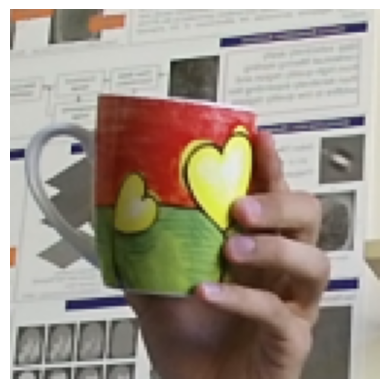

In [6]:
#Can't load using ImageFolder test and validation set, too many problems. 
#Test does not have labels so I cannot load it using imageFolder which needs label and validation
#can't be constructed because i would need to obtain it from train which is not randomizable easily

import random

# Data loading options
batch_size = 32 
load_size = 127 #127 is the size expressed in every bounding box if you notice
crop_size =127
norm_mean = (0.5)
norm_std = (0.5)

# Train transform
train_transform = T.Compose([
    T.Resize(load_size),
    T.RandomCrop(crop_size),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    T.Normalize(mean=norm_mean,std=norm_std)
])

# Test transform, will be used later
test_transform = T.Compose([
    T.Resize(load_size),
    T.CenterCrop(crop_size),
    T.ToTensor(),
    T.Normalize(mean=norm_mean,std=norm_std)
])

#Just used to show visually the result of the transformation 
prova_transform=T.Compose([
    T.Resize(load_size),
    T.CenterCrop(crop_size),
    T.RandomHorizontalFlip(),
])

root_dir=directory
train_folder="train cropped"
test_folder="test cropped"

# Instantiate datasets
train_dataset = ImageFolder(train_folder, transform=train_transform)
prova_dataset= ImageFolder(train_folder, transform=prova_transform)

# Get number of classes (we'll need it in the model)
num_classes = len(train_dataset.classes)

# Print dataset statistics
print(f"Num. classes: {num_classes}")
print(f"Num. train samples: {len(train_dataset)}")

#show an image to verify the transformation
random_index=random.randint(0, 1599)
plt.imshow(prova_dataset[random_index][0])
plt.axis('off')

# Instantiate data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, num_workers=2, shuffle=True)

In [7]:
# Imports
import torch.nn as nn
import torch.nn.functional as F
from torchvision.models.alexnet import AlexNet_Weights



# Define fine-tuned model
class FineTunedAlexNet(nn.Module):
    
    def __init__(self):
        super().__init__()
        # Load AlexNet model
        alexnet=models.alexnet(weights=AlexNet_Weights.DEFAULT)
        # Select feature extraction part
        self.features = alexnet.features
        # Add layers
        self.fc_layers = nn.Sequential(
            # FC layer 1
            nn.Linear(2304, 1024),
            nn.Dropout(0.5),
            nn.ReLU(),
            # FC layer 2
            nn.Linear(1024 , 256),
            nn.Dropout(0.5),
            nn.ReLU(),
            # Classification layer
            nn.Linear(256, num_classes)
        )
        
    
    def forward(self, x):
        # Go through the pre-trained layers
        x = self.features(x)
        # Go through added layers
        x = x.view(x.size(0), -1)
            # Create fully-connected layers
        x=self.fc_layers(x)
        return x
    
# Imports
import torch.nn as nn
import torch.nn.functional as F

# Define model
class MyModel(nn.Module):
    # Constructor
    def __init__(self):
        # Call parent constructor
        super().__init__();
        # Create convolutional layers
        self.conv_layers = nn.Sequential(
            # Layer 1
            nn.Conv2d(3, 32, kernel_size=7, padding=0, stride=3),    
            nn.ReLU(),                                               
            nn.BatchNorm2d(32),                                      
            # Layer 2
            nn.Conv2d(32, 64, kernel_size=5, padding=0, stride=2),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            # Layer 3
            nn.Conv2d(64, 128, kernel_size=5, padding=0, stride=2),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        # Create fully-connected layers
        self.fc_layers = nn.Sequential(
            # FC layer
            nn.Linear(2048 , 256),
            nn.Dropout(0.5),
            nn.ReLU(),
            nn.Linear(256 , 32),
            nn.Dropout(0.5),
            nn.ReLU(),
            # Classification layer
            nn.Linear(32, num_classes)
        )

    # Forward
    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        return x

In [8]:
# Create model
model = FineTunedAlexNet()
#model=MyModel()

# Test model output
model.eval()
test_input = train_dataset[0][0].unsqueeze(0)

print("Model output size:", model(test_input).size())

# Move model to CUDA
model=model.to(dev)

#define criterion
#class_weights=np.array([1, 8, 8, 8, 8, 8, 8, 8])
#class_weights=torch.from_numpy(class_weights).float().to(dev)
#criterion=nn.CrossEntropyLoss(weight=class_weights) # If weighed loss
criterion=nn.CrossEntropyLoss()
# Create optimizer
learning_rate=3e-5
weight_decay=1e-2
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate,weight_decay=weight_decay)

# Initialize training history
Hystory_loss=[]
Hystory_accuracy=[]

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 236MB/s]  


Model output size: torch.Size([1, 8])


In [9]:
# Start training
n_epochs=10
for epoch in range(n_epochs):
    # Initialize variables for computing average loss/accuracy
    total_loss=0
    total_accuracy=0
    # Process each split
    model.train()
    # Process all data in split
    for  (input,target) in train_loader:
        # Move to CUDA
        input=input.to(dev)
        target=target.to(dev)
        optimizer.zero_grad()
        # Compute loss
        output=model(input)
        loss=criterion(output,target)
        total_loss+=loss.item()
        # Update variables for average epoch loss
        # Compute accuracy
        output_label=output.argmax(1)
        batch_accuracy=(output_label==target).sum().item()/batch_size
        # Update variables for average epoch accuracy
        total_accuracy+=batch_accuracy
        # Backward and optimize
        loss.backward()
        optimizer.step()
    # Compute average epoch loss/accuracy
    # Append average values to history lists
    Hystory_loss.append(total_loss/len(train_loader))
    Hystory_accuracy.append(total_accuracy/len(train_loader))
    print(f"Epoch {epoch+1}:",
          f"Train Loss={Hystory_loss[-1]:.4f},",
                  f"Train Accuracy={Hystory_accuracy[-1]:.4f}")
    

Epoch 1: Train Loss=1.8264, Train Accuracy=0.3519
Epoch 2: Train Loss=0.7432, Train Accuracy=0.7812
Epoch 3: Train Loss=0.2391, Train Accuracy=0.9281
Epoch 4: Train Loss=0.1418, Train Accuracy=0.9575
Epoch 5: Train Loss=0.0925, Train Accuracy=0.9738
Epoch 6: Train Loss=0.0808, Train Accuracy=0.9756
Epoch 7: Train Loss=0.0646, Train Accuracy=0.9762
Epoch 8: Train Loss=0.0495, Train Accuracy=0.9825
Epoch 9: Train Loss=0.0426, Train Accuracy=0.9906
Epoch 10: Train Loss=0.0278, Train Accuracy=0.9938


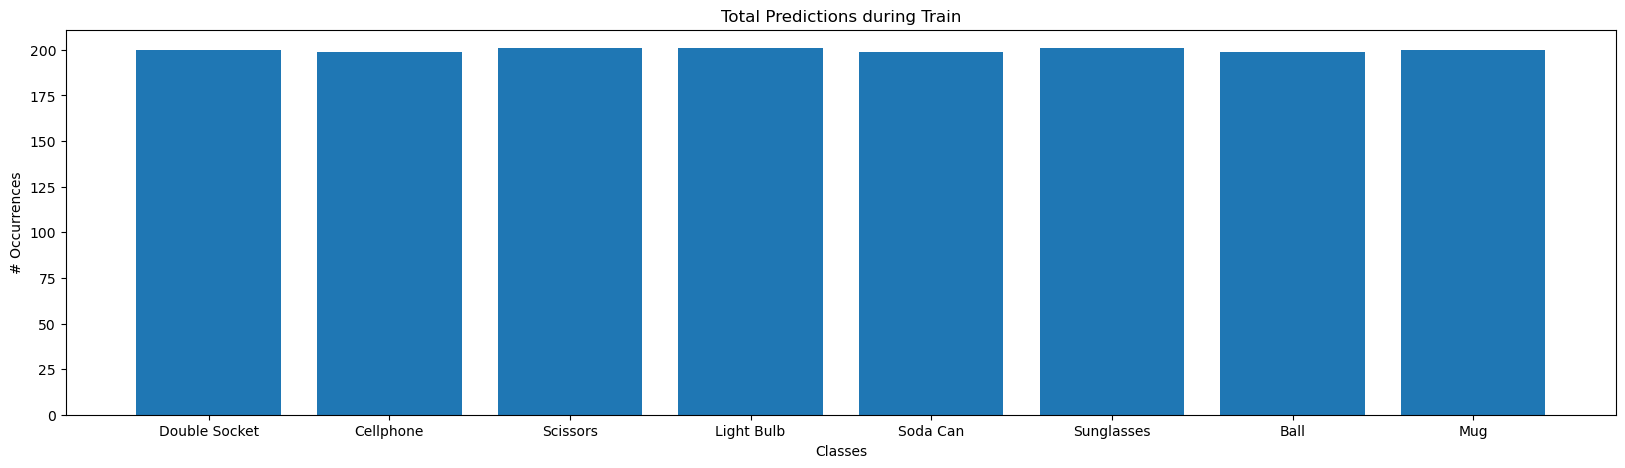

In [10]:
#Show training prediction distribution    
total_predictions_train=np.zeros(num_classes) #To count each class how many times was predicted in train

# Go through the whole train dataset one last time to assess the prediction distribution 
model.eval() 
for  (input,target) in train_loader:
        input=input.to(dev)
        target=target.to(dev)
        # Compute loss
        output=model(input)
        output_label=output.argmax(1)
        output_label=output_label.cpu()
        for i in range(batch_size):
            total_predictions_train[output_label[i].item()]+=1

# Bar Plot of the results
            
# Class labels
classes = ['Double Socket', 'Cellphone', 'Scissors', 'Light Bulb', 'Soda Can','Sunglasses','Ball','Mug'] 

# Create the bar plot
plt.figure(figsize=(20, 5))
plt.bar(classes, total_predictions_train)

# Customize the plot
plt.xlabel('Classes')
plt.ylabel('# Occurrences')
plt.title('Total Predictions during Train')

# Display the plot
plt.show()    

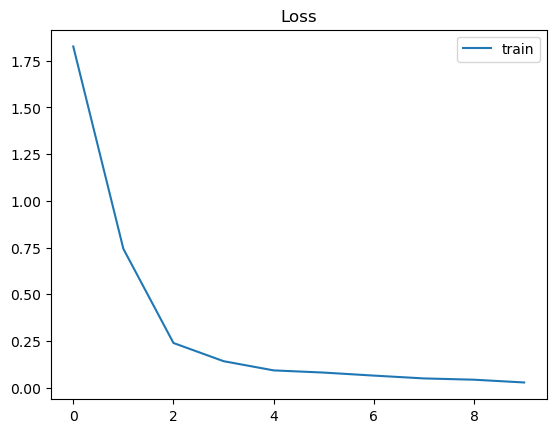

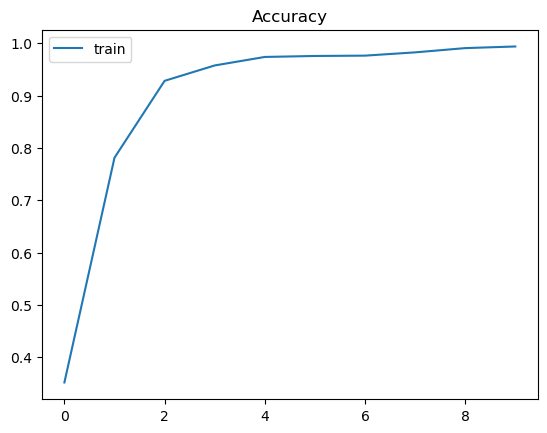

Predicted: 6 (correct: 6)


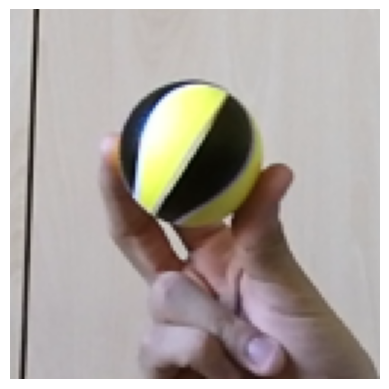

In [11]:
#Loss and accuracy graphs
import random

# Plot loss history
from matplotlib import pyplot as plt
plt.title("Loss")
plt.plot(Hystory_loss, label='train')
plt.legend()
plt.show()

# Plot accuracy history
plt.title("Accuracy")
plt.plot(Hystory_accuracy, label='train')
plt.legend()
plt.show()

# Get random sample from test set
idx = random.randint(0, len(train_dataset)-1)
input, label = train_dataset[idx]
#input=input[0].unsqueeze(0) #in case of gray scale
# Normalize and show image
input_show = (input - input.min())/(input.max() - input.min())
plt.imshow(input_show.permute(1,2,0).numpy())
plt.axis('off')
# Predict class
model.eval()
with torch.no_grad():
        output = model(input.unsqueeze(0).to(dev))
_,pred = output.max(1)
pred = pred.item()
print(f"Predicted: {pred} (correct: {label})")

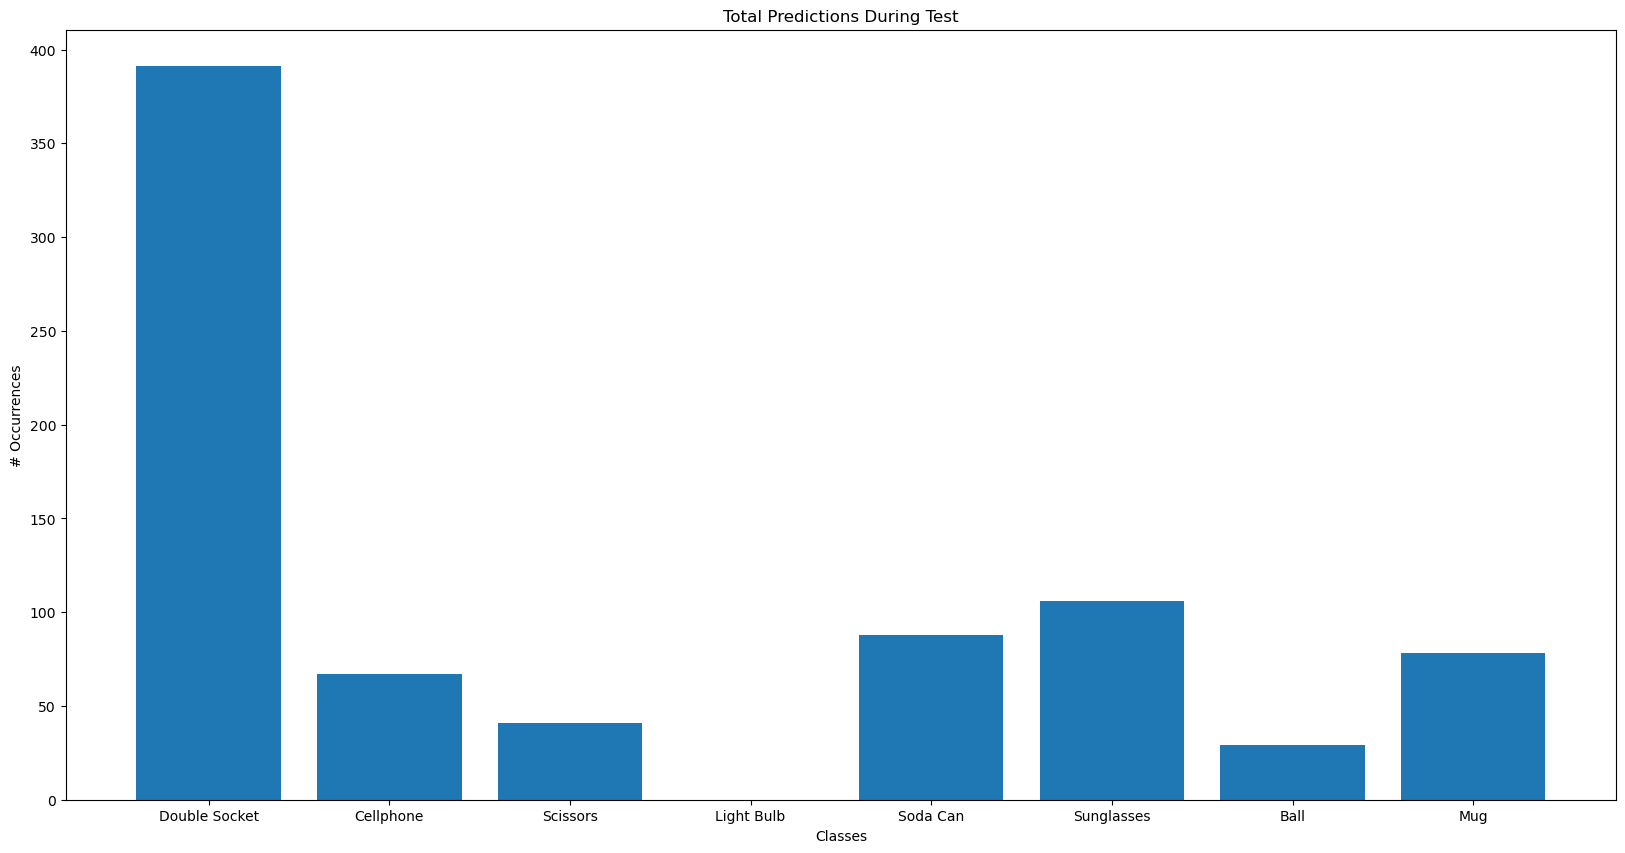

In [12]:
#Now we test the model
if os.path.exists("submission.csv"):
    os.remove("submission.csv")

#We select the test cropped directory
source_dir=test_folder
model.eval() #put the model in evaluation
data=[] #the classification results will be stored here
total_predictions_test=np.zeros(num_classes) #Here the number of predictions for each class for the test set will be saved 
for root, dirs, files in os.walk(source_dir): #Walk through every file in every folder of the selected path
    for file in sorted(files):
        # Get the image file path
        image_path = os.path.join(root, file)
            
        # Open the image
        image = Image.open(image_path)
        # Transform it according to the test transformation
        input=test_transform(image)
        with torch.no_grad():
                output = model(input.unsqueeze(0).to(dev)) #compute the output of the model
        _,pred = output.max(1) #the maximum is the prediction
        pred = pred.item()
        data.append([file,pred]) #Save name of the file and prediction to the row
        total_predictions_test[pred]+=1 # Update the number of occurrances
        
# Specify the CSV file path
csv_file = 'submission.csv'

# Open the CSV file in write mode
with open(csv_file, mode='w', newline='') as file:
        writer = csv.writer(file)
    
        # Write the header row
        writer.writerow(['image', 'class'])
    
        # Write each row of data
        writer.writerows(data)

#Test prediction distributions


# Class labels
classes = ['Double Socket', 'Cellphone', 'Scissors', 'Light Bulb', 'Soda Can','Sunglasses','Ball','Mug'] 

# Create the bar plot
plt.figure(figsize=(20, 10))
plt.bar(classes, total_predictions_test)

# Customize the plot
plt.xlabel('Classes')
plt.ylabel('# Occurrences')
plt.title('Total Predictions During Test')

# Display the plot
plt.show()

In [13]:
#******************************************************Non used strategies******************************************************

(-0.5, 126.5, 126.5, -0.5)

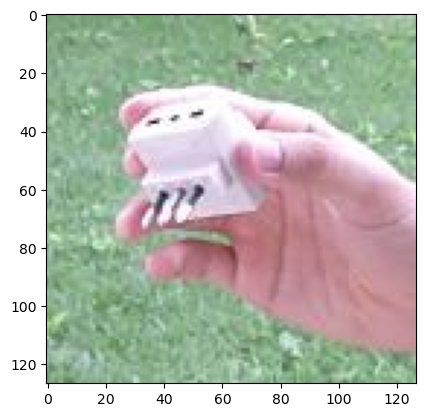

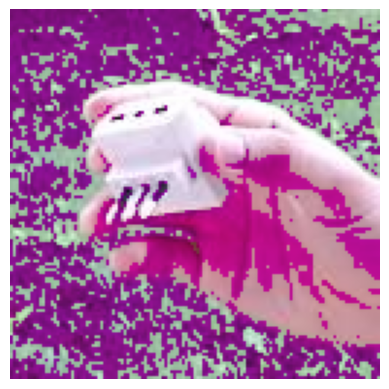

In [14]:
#example of remove green

#This function is used to convert a rgb image to a normalized gray scale
def remove_green(image):
    # Extract the height (H) and width (W) dimensions of the image
    H, W, _ = image.shape
    # Define thresholds
    white_threshold=480
    green_threshold=60

    # Initialize a new image with dimensions HxW
    output_image = np.copy(image)

    # Iterate over every pixel in the image
    for i in range(H):
        for j in range(W):
            # Extract the RGB values for the current pixel
            r, g, b = image[i, j]

            # Calculate the L2 norm for the pixel
            sum = ((r) + (g) + (b))

            # Assign the L2 norm value to the corresponding pixel in the new image
            if (sum<white_threshold and g>green_threshold): #Only if the pixel is not kind of white but very green
                output_image[i, j] = [r, g*.1, b] # The corresponding pixel will have the green value much more attenuated
    return output_image


# Load the image
image = Image.open('/kaggle/working/test cropped/509.jpg')
image=np.array(image, dtype=np.int32)
plt.figure()
plt.imshow(image)

# Remove green
result_image=remove_green(image)
plt.figure()
plt.imshow(result_image)
plt.axis('off')

Text(0.5, 1.0, 'Final Result')

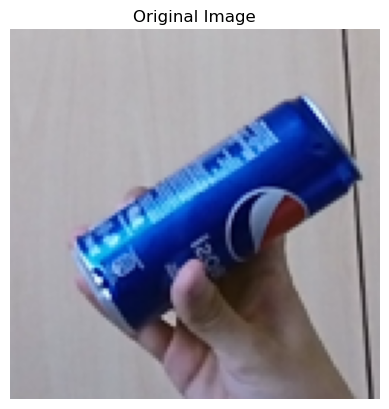

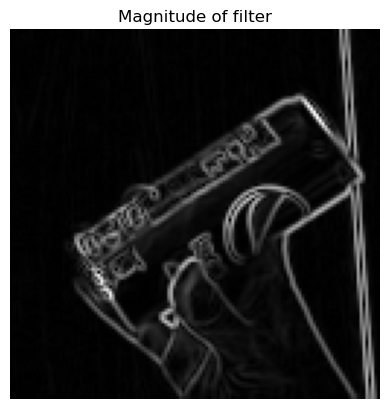

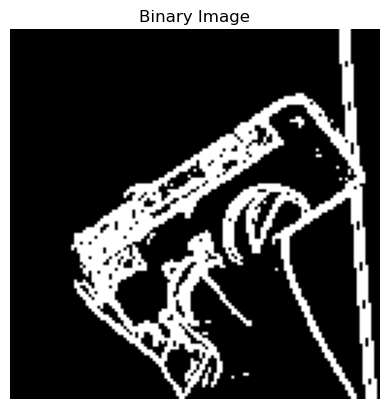

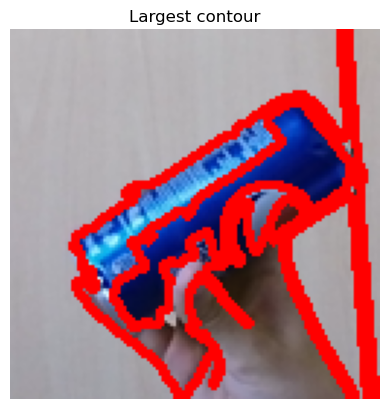

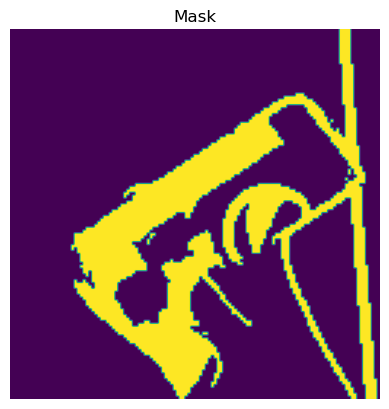

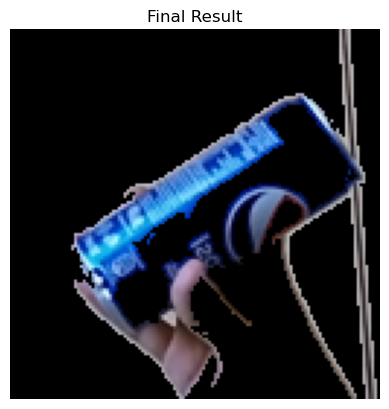

In [15]:
#background removal through derivative filters (white pixel only when inside the biggest contour, black everything else)

import random
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

selected='train'

if selected=='test':
    random_image = random.randint(0, 799)
    print('Image:', random_image)
    image_colored = Image.open('/kaggle/working/test cropped/' + str(random_image).zfill(3) + '.jpg')
else: 
    random_image = random.randint(0, 199)
    random_class=random.randint(0, 7)
    image_colored = Image.open('/kaggle/working/train cropped/'+ str(random_class).zfill(2) + "/" + str(random_class).zfill(2) + "_" + str(random_image).zfill(3) + '.png')

# Show the original Image
plt.figure()
plt.imshow(np.array(image_colored, dtype=np.uint8))
plt.axis("off")
plt.title('Original Image')

image = image_colored.convert('L')  # Convert to grayscale
image = np.array(image, dtype=np.uint8)
image_colored = np.array(image_colored, dtype=np.uint8)

sobel_h = cv2.Sobel(image, cv2.CV_64F, 1, 0)  # horizontal gradient
sobel_v = cv2.Sobel(image, cv2.CV_64F, 0, 1)  # vertical gradient
magnitude = np.sqrt(sobel_h ** 2 + sobel_v ** 2)
magnitude *= 255.0 / np.max(magnitude)

plt.figure()
plt.imshow(magnitude, cmap='gray')
plt.title('Magnitude of filter')
plt.axis("off")

# Define the threshold value
threshold = np.max(magnitude) * 0.1

# Threshold the magnitude image
_, binary_image = cv2.threshold(magnitude, threshold, 255, cv2.THRESH_BINARY)
binary_image = binary_image.astype(np.uint8)

plt.figure()
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis("off")

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the contour with the largest area
largest_contour = max(contours, key=cv2.contourArea)

# Show this contour
image_contoured=np.copy(image_colored)
cv2.drawContours(image_contoured, [largest_contour], -1, 255, thickness=2)
plt.figure()
plt.imshow(image_contoured)
plt.title("Largest contour")
plt.axis("off")
        

# Create a blank mask with white background
mask = np.ones_like(binary_image) * 255
cv2.fillPoly(mask, [largest_contour], 0)  # Fill the contour with black pixels on the mask

# Invert the mask to get the area outside the contours
mask = cv2.bitwise_not(mask)

# Display the mask
plt.figure()
plt.imshow(mask)
plt.title('Mask')
plt.axis("off")
mask=mask/255;
result_image=np.copy(image_colored)

# MASK APPLICATION 
H, W= magnitude.shape
for i in range(H):
    for j in range(W):
        result_image[i,j]=(image_colored[i,j]*mask[i,j])

# Show the result
plt.figure()
plt.imshow(result_image)
plt.axis("off")
plt.title('Final Result')